In [2]:
import pandas as pd 
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\user\Desktop\Projects\British_Airways_Project\Data\customer_booking.csv",encoding='latin1')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
data.shape

(50000, 14)

In [9]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [13]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [14]:
data.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

## EDA

## Plots

In [10]:
len(data.columns)

14

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

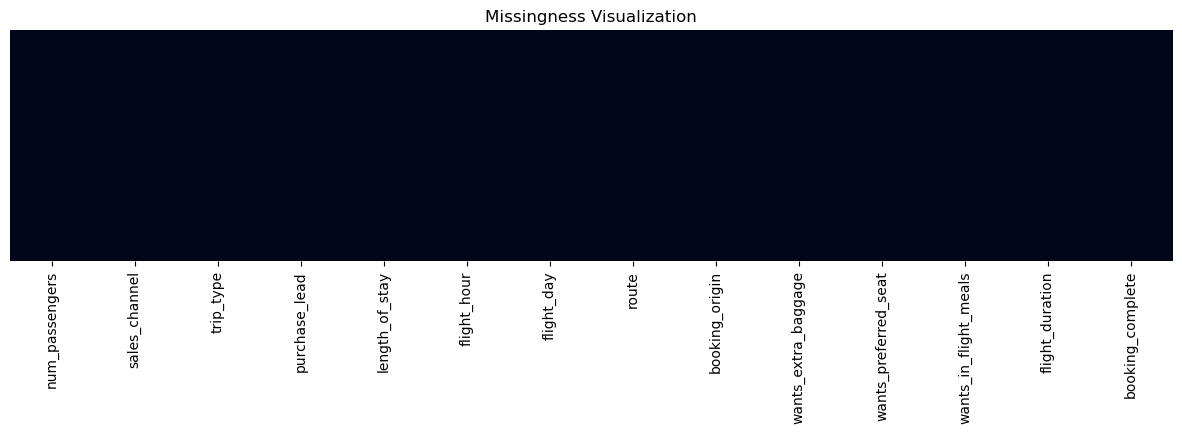

In [9]:
plt.figure(figsize=(15,3))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)
plt.title("Missingness Visualization")
plt.show()

In [11]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [13]:
def separate_df(dataframe):
    num_df = data.select_dtypes(include=['number'])
    cat_df = data.select_dtypes(exclude=['number'])
    return num_df, cat_df

In [14]:
num_df, cat_df = separate_df(data)

In [17]:
print(f"Numerical Dataframe : {num_df.shape}")
print(f"Categorical Dataframe : {cat_df.shape}")

Numerical Dataframe : (50000, 9)
Categorical Dataframe : (50000, 5)


In [28]:
def plot_boxplots(data):
    num_cols = len(data.columns)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))  # Create subplots

    for i, column in enumerate(data.columns):
        ax = axes[i // 3, i % 3] if num_rows > 1 else axes[i % 3]  # Select subplot
        data.boxplot(column=column, ax=ax)  # Plot boxplot for the column
        # sns.stripplot(y=column,data=data,color='magenta',size=2,ax=ax)
        ax.set_title(f'Boxplot of {column}')  # Set the title

    plt.tight_layout()  # Adjust layout
    plt.show()  # Show the plots


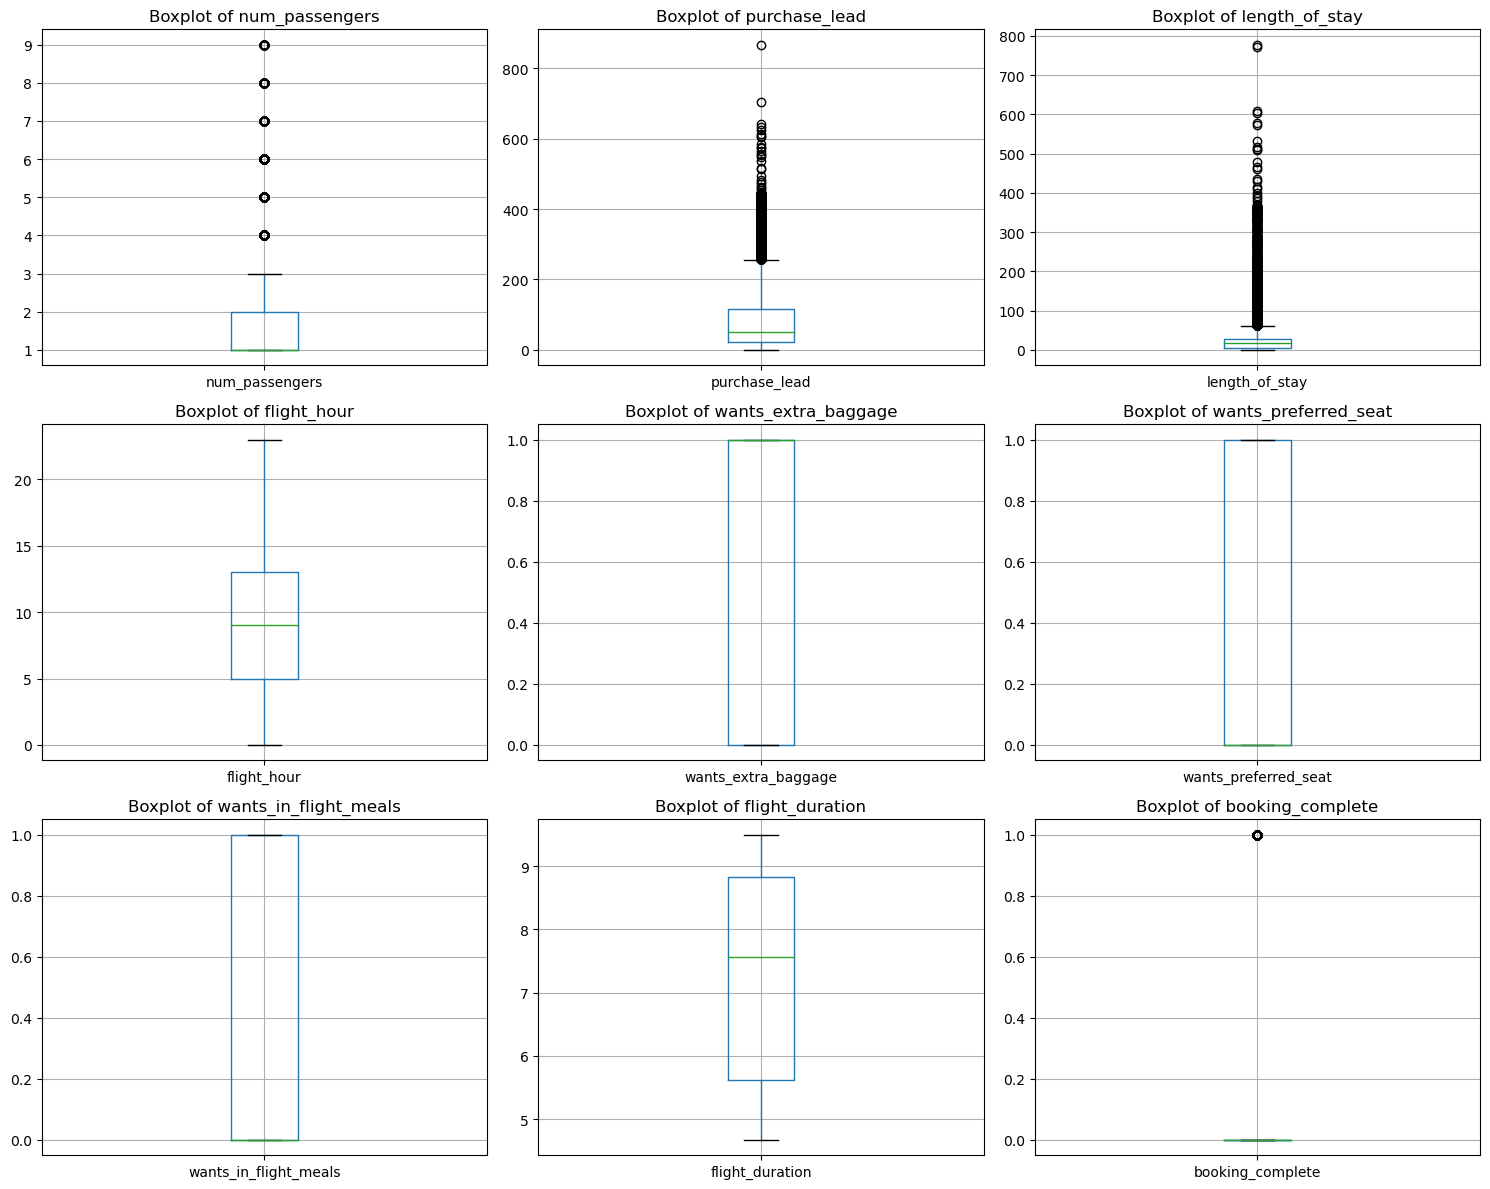

In [29]:
plot_boxplots(num_df)

In [23]:
data['wants_in_flight_meals'].value_counts()

wants_in_flight_meals
0    28643
1    21357
Name: count, dtype: int64

In [44]:
def plot_kdeplots(data):
    num_cols = len(data.columns)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))  # Create subplots

    for i, column in enumerate(data.columns):
        ax = axes[i // 3, i % 3] if num_rows > 1 else axes[i % 3]  # Select subplot
        plt.hist(x=column, ax=ax,data=data)  # Plot boxplot for the column
        ax.set_title(f'Distribution of {column}')  # Set the title

    plt.tight_layout()  # Adjust layout
    plt.show()  # Show the plots

(array([31352.,     0., 12804.,     0.,     0.,  2941.,     0.,  1784.,
            0.,     0.,   561.,     0.,   289.,     0.,     0.,   114.,
            0.,    89.,     0.,    66.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

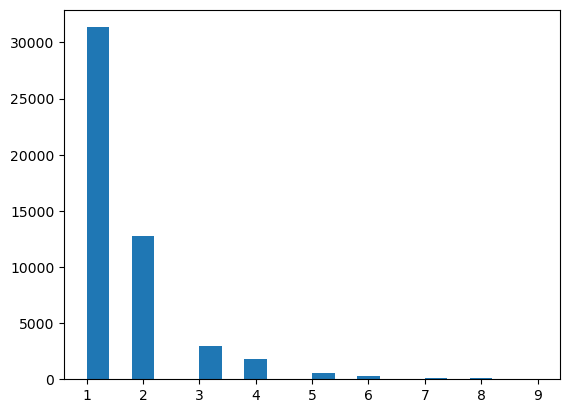

In [47]:
plt.hist(data=data,x='num_passengers',bins=20)

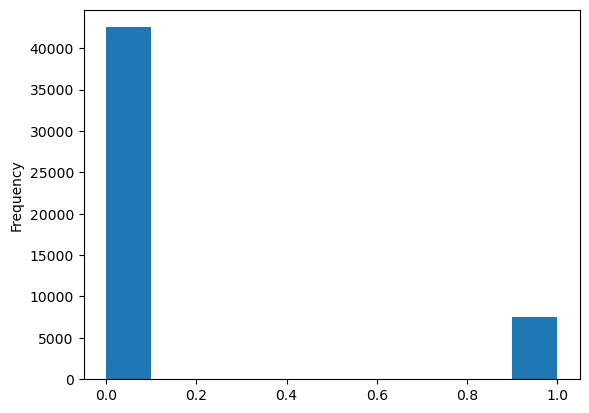

In [52]:
#  Target Variable

data['booking_complete'].plot(kind='hist')
plt.show()

In [54]:
data['booking_complete'].value_counts(normalize=True)*100

booking_complete
0    85.044
1    14.956
Name: proportion, dtype: float64

- We clearly have a class imbalance.

In [55]:
cat_df.head()

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


In [ ]:
def plot_cat(data):
    

# One Hot Encoding

In [56]:
cat_df.columns

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [61]:
cat_df_enc = pd.get_dummies(cat_df,columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])

In [62]:
cat_df_enc.head()

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,True,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Splitting the data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,PredefinedSplit
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = final_data.drop(columns=['booking_complete'])
y = final_data['booking_complete']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

In [ ]:
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [1,2], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

In [ ]:
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [ ]:
custom_split

In [ ]:
model = RandomForestClassifier(random_state=0)

In [ ]:
model_val = GridSearchCV(model,cv_params,cv=custom_split,refit='f1', n_jobs = -1, verbose = 1)

In [ ]:
model_val.fit(X_train,y_train)

In [ ]:
params = model_val.best_params_
params

In [ ]:
model_opt = RandomForestClassifier(n_estimators = 100, max_depth = 50, 
                                min_samples_leaf = 2, min_samples_split = 0.001,
                                max_features="sqrt", max_samples = 0.9, random_state = 0)

In [ ]:
model = RandomForestRegressor(n_estimators=10)
scores = cross_val_score(model,X_train,y_train,cv=10,scoring='r2')
print(scores,scores.mean())

In [ ]:
model_opt.fit(X_train,y_train)

In [ ]:
y_pred = model_opt.predict(X_test)

In [ ]:
precision = precision_score(y_test,y_pred,pos_label='satisfied')
precision

In [ ]:
recall = recall_score(y_test,y_pred,pos_label='satisfied')
recall

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

In [ ]:
f1 = f1_score(y_test,y_pred,pos_label='satisfied')
f1

In [ ]:
# Create table of results.

results = pd.DataFrame(columns=['accuracy','precision','recall','f1'])
results.append({'accuracy':round(accuracy*100,2),
               'precision':round(precision*100,2),
               'recall':round(recall*100,2),
               'f1':round(f1*100,2)},
              ignore_index=True)

In [ ]:
# Saving the first base model

# Use `pickle` to save the trained model.

pkl.dump(output, open('xgb_cv.sav', 'wb'))

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=output.classes_)

disp.plot()
plt.show()

# SMOTE 